In [ ]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# The file location
merged_stats = "https://raw.githubusercontent.com/csc442-team11/MLB-Data-Analysis/refs/heads/main/Datasets/mlb-player-stats-Batters-2023-2024-cleaned.csv"


# Read in the file
df_merged = pd.read_csv(merged_stats)

# EDA

1.   Check column types: Categorical, Numerical or String
2. Identify distributions in the columns
3. Identify patterns among two variables
4. Identify patterns among more than two varaibles
5. This should help you identify good questions - for analysis.


In [ ]:
#descriptive stats
df_merged.describe()

Year         Age           G          PA          AB  \
count   909.000000  909.000000  909.000000  909.000000  909.000000   
mean   2023.526953   28.920792   93.720572  376.479648  337.806381   
std       0.499548    3.677874   44.827042  184.687869  164.497747   
min    2023.000000   20.000000   21.000000   81.000000   70.000000   
25%    2023.000000   26.000000   56.000000  222.000000  197.000000   
50%    2024.000000   28.000000   92.000000  366.000000  332.000000   
75%    2024.000000   31.000000  132.000000  528.000000  478.000000   
max    2024.000000   40.000000  162.000000  752.000000  671.000000   

                R           H          2B          3B          HR  ...  \
count  909.000000  909.000000  909.000000  909.000000  909.000000  ...   
mean    45.543454   83.883388   16.674367    1.465347   11.899890  ...   
std     27.045962   46.420716   10.024618    1.893112    9.609552  ...   
min      2.000000    9.000000    1.000000    0.000000    0.000000  ...   
25%     23.000000   44.000000    8.000000    0.000000    4.000000  ...   
50%     43.000000   79.000000   16.000000    1.000000   10.000000  ...   
75%     63.000000  120.000000   24.000000    2.000000   18.000000  ...   
max    149.000000  217.000000   59.000000   14.000000   58.000000  ...   

               CS          BB          SO          SH          SF        HBP  \
count  909.000000  909.000000  909.000000  909.000000  909.000000  909.00000   
mean     1.874587   31.903190   84.348735    0.832783    2.473047    4.29703   
std      2.369432   21.260848   42.948520    1.579251    2.190435    4.11479   
min      0.000000    1.000000    9.000000    0.000000    0.000000    0.00000   
25%      0.000000   15.000000   50.000000    0.000000    1.000000    1.00000   
50%      1.000000   27.000000   79.000000    0.000000    2.000000    3.00000   
75%      3.000000   44.000000  114.000000    1.000000    4.000000    6.00000   
max     16.000000  133.000000  218.000000   14.000000   13.000000   34.00000   

              AVG         OBP         SLG         OPS  
count  909.000000  909.000000  909.000000  909.000000  
mean     0.240366    0.310315    0.393106    0.703420  
std      0.035329    0.039523    0.077586    0.107961  
min      0.119000    0.168000    0.167000    0.363000  
25%      0.218000    0.286000    0.341000    0.633000  
50%      0.243000    0.311000    0.392000    0.705000  
75%      0.264000    0.334000    0.444000    0.774000  
max      0.354000    0.458000    0.701000    1.159000  

[8 rows x 22 columns]

# Univariate Analysis

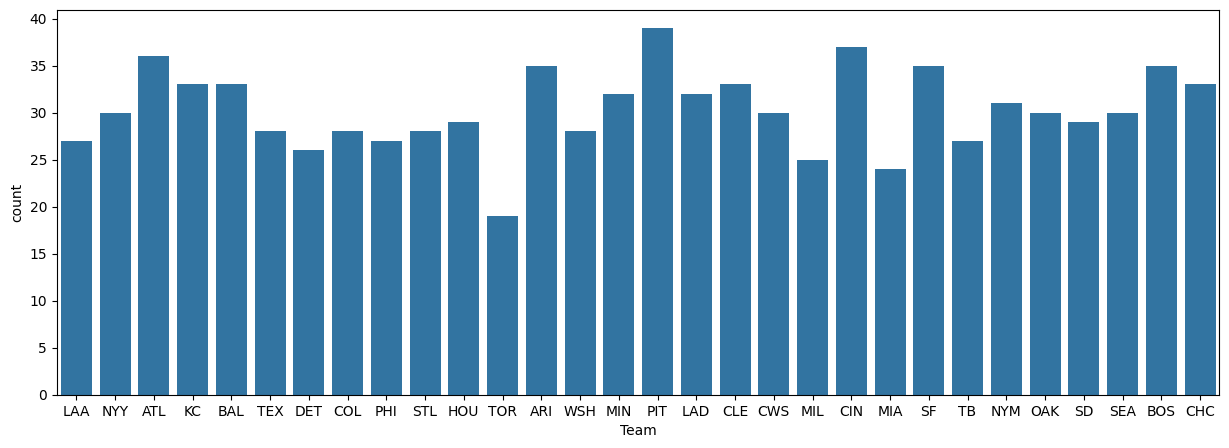

In [ ]:
# plot distribution of players per team
plt.figure(figsize=(15, 5))
df_merged["Team"].value_counts()
sns.countplot(x="Team", data=df_merged)
plt.show()

#### Check distributions of Numerical column

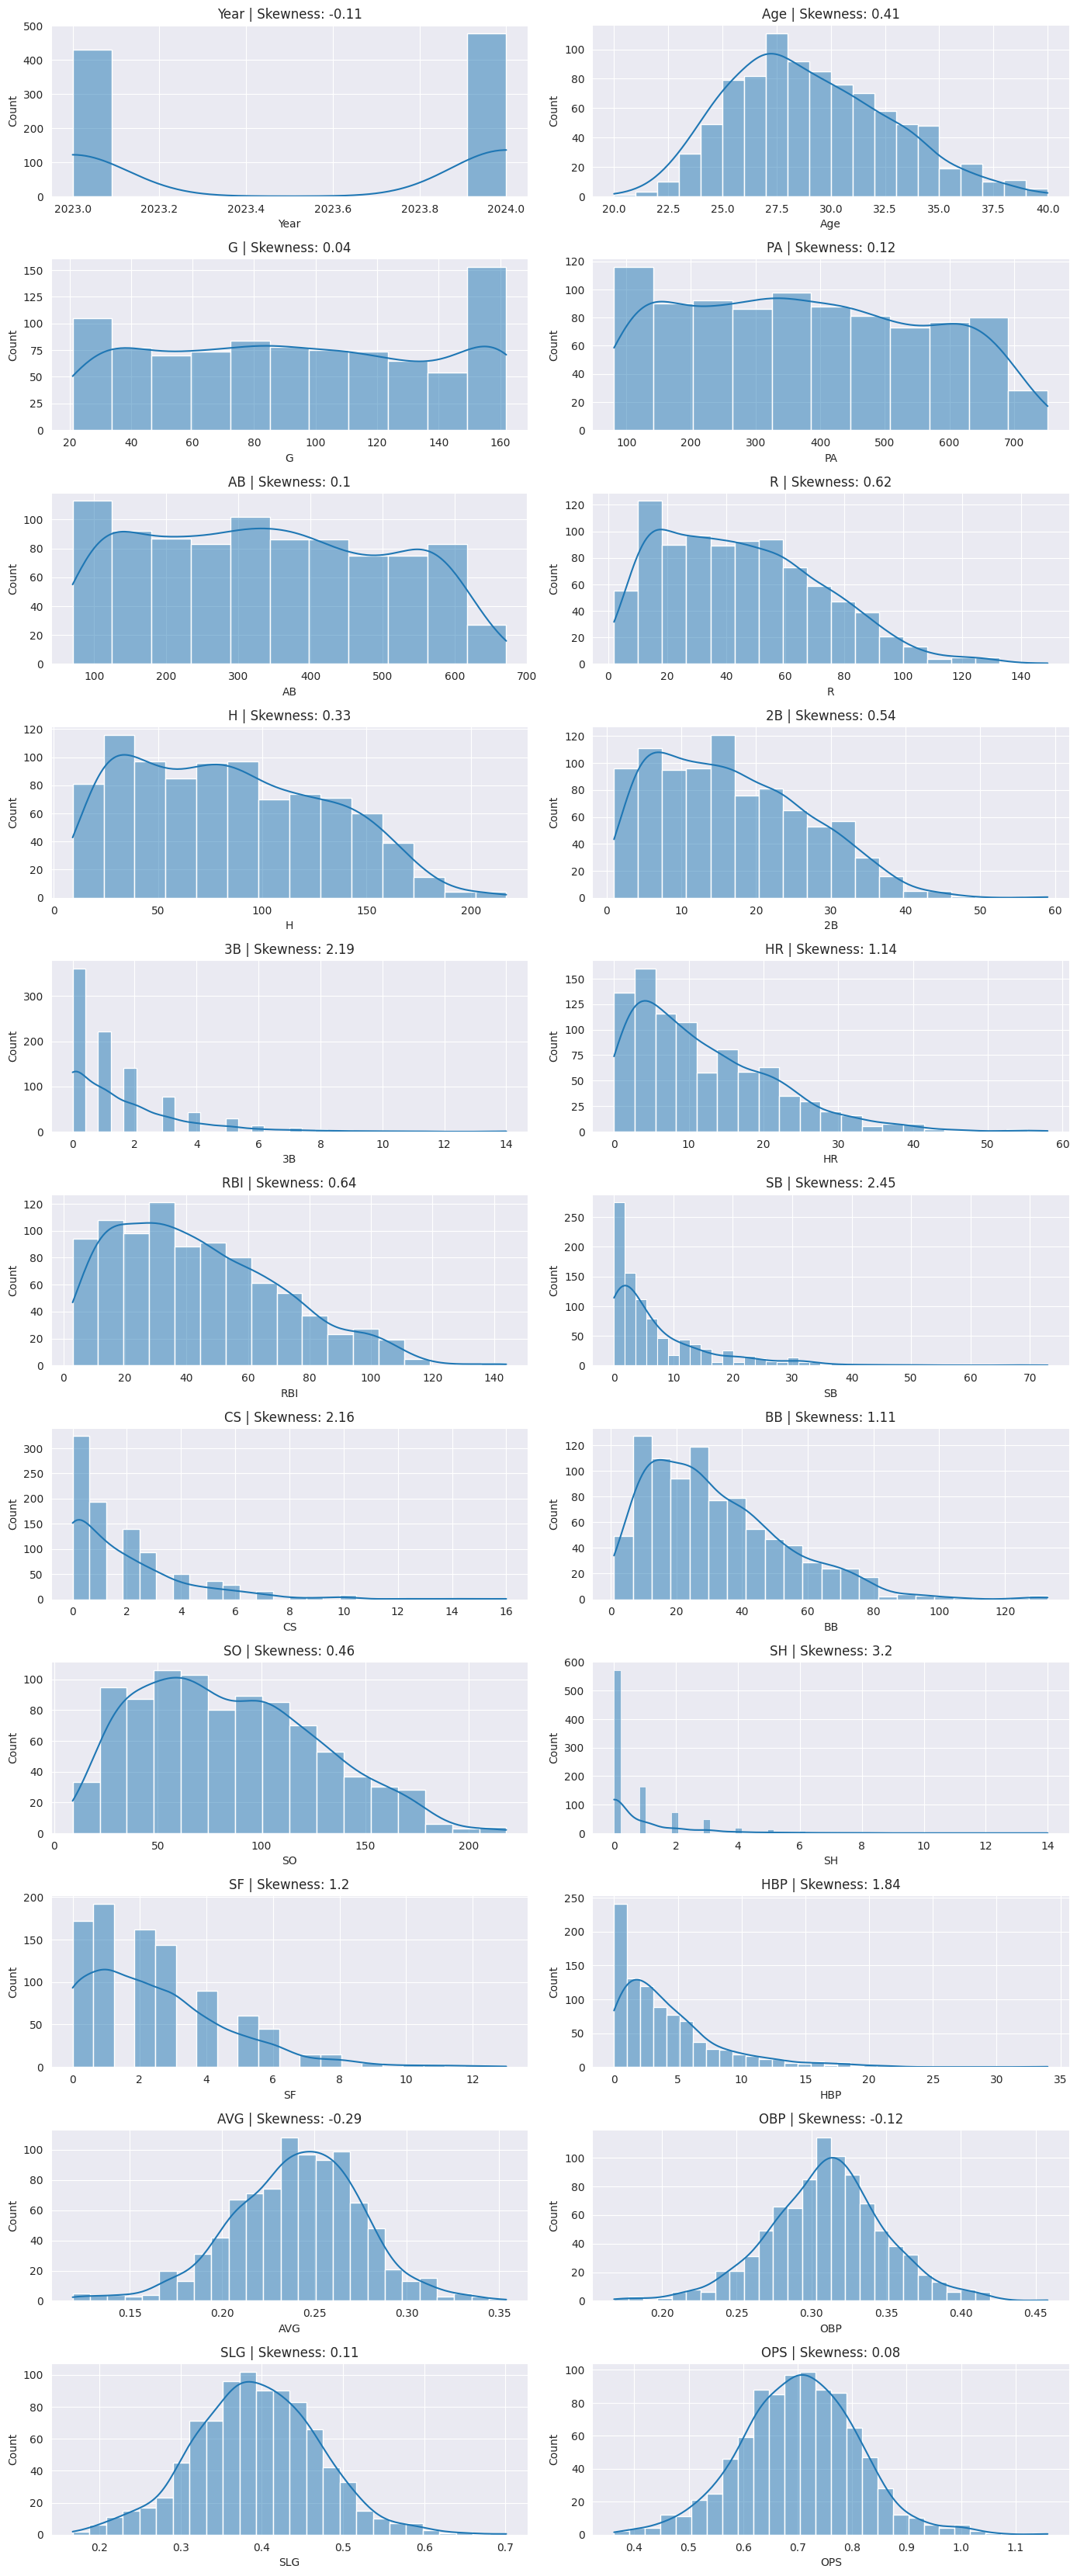

In [ ]:
# kernel density plots to show skewness of numerical columns
sns.set_style("darkgrid")

numerical_columns = df_merged.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df_merged[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df_merged[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

This can help you see the variance in the different columns.
- skewness – exactly 0 depicts the symmetrical distribution
- the plots with skewness 1 or above 1 is positively or right skewd distribution. Right skewd or positively skewed distribution if the tail is more on the right side, that indicates extremely high values.

## Bivariate analysis

When doing a bivariate analysis, two variables are examined simultaneously in order to look for patterns, dependencies, or interactions between them. Understanding how changes in one variable may correspond to changes in another requires the use of this statistical method.

Let’s plot a pair plot for the data.

<Figure size 1000x600 with 0 Axes>

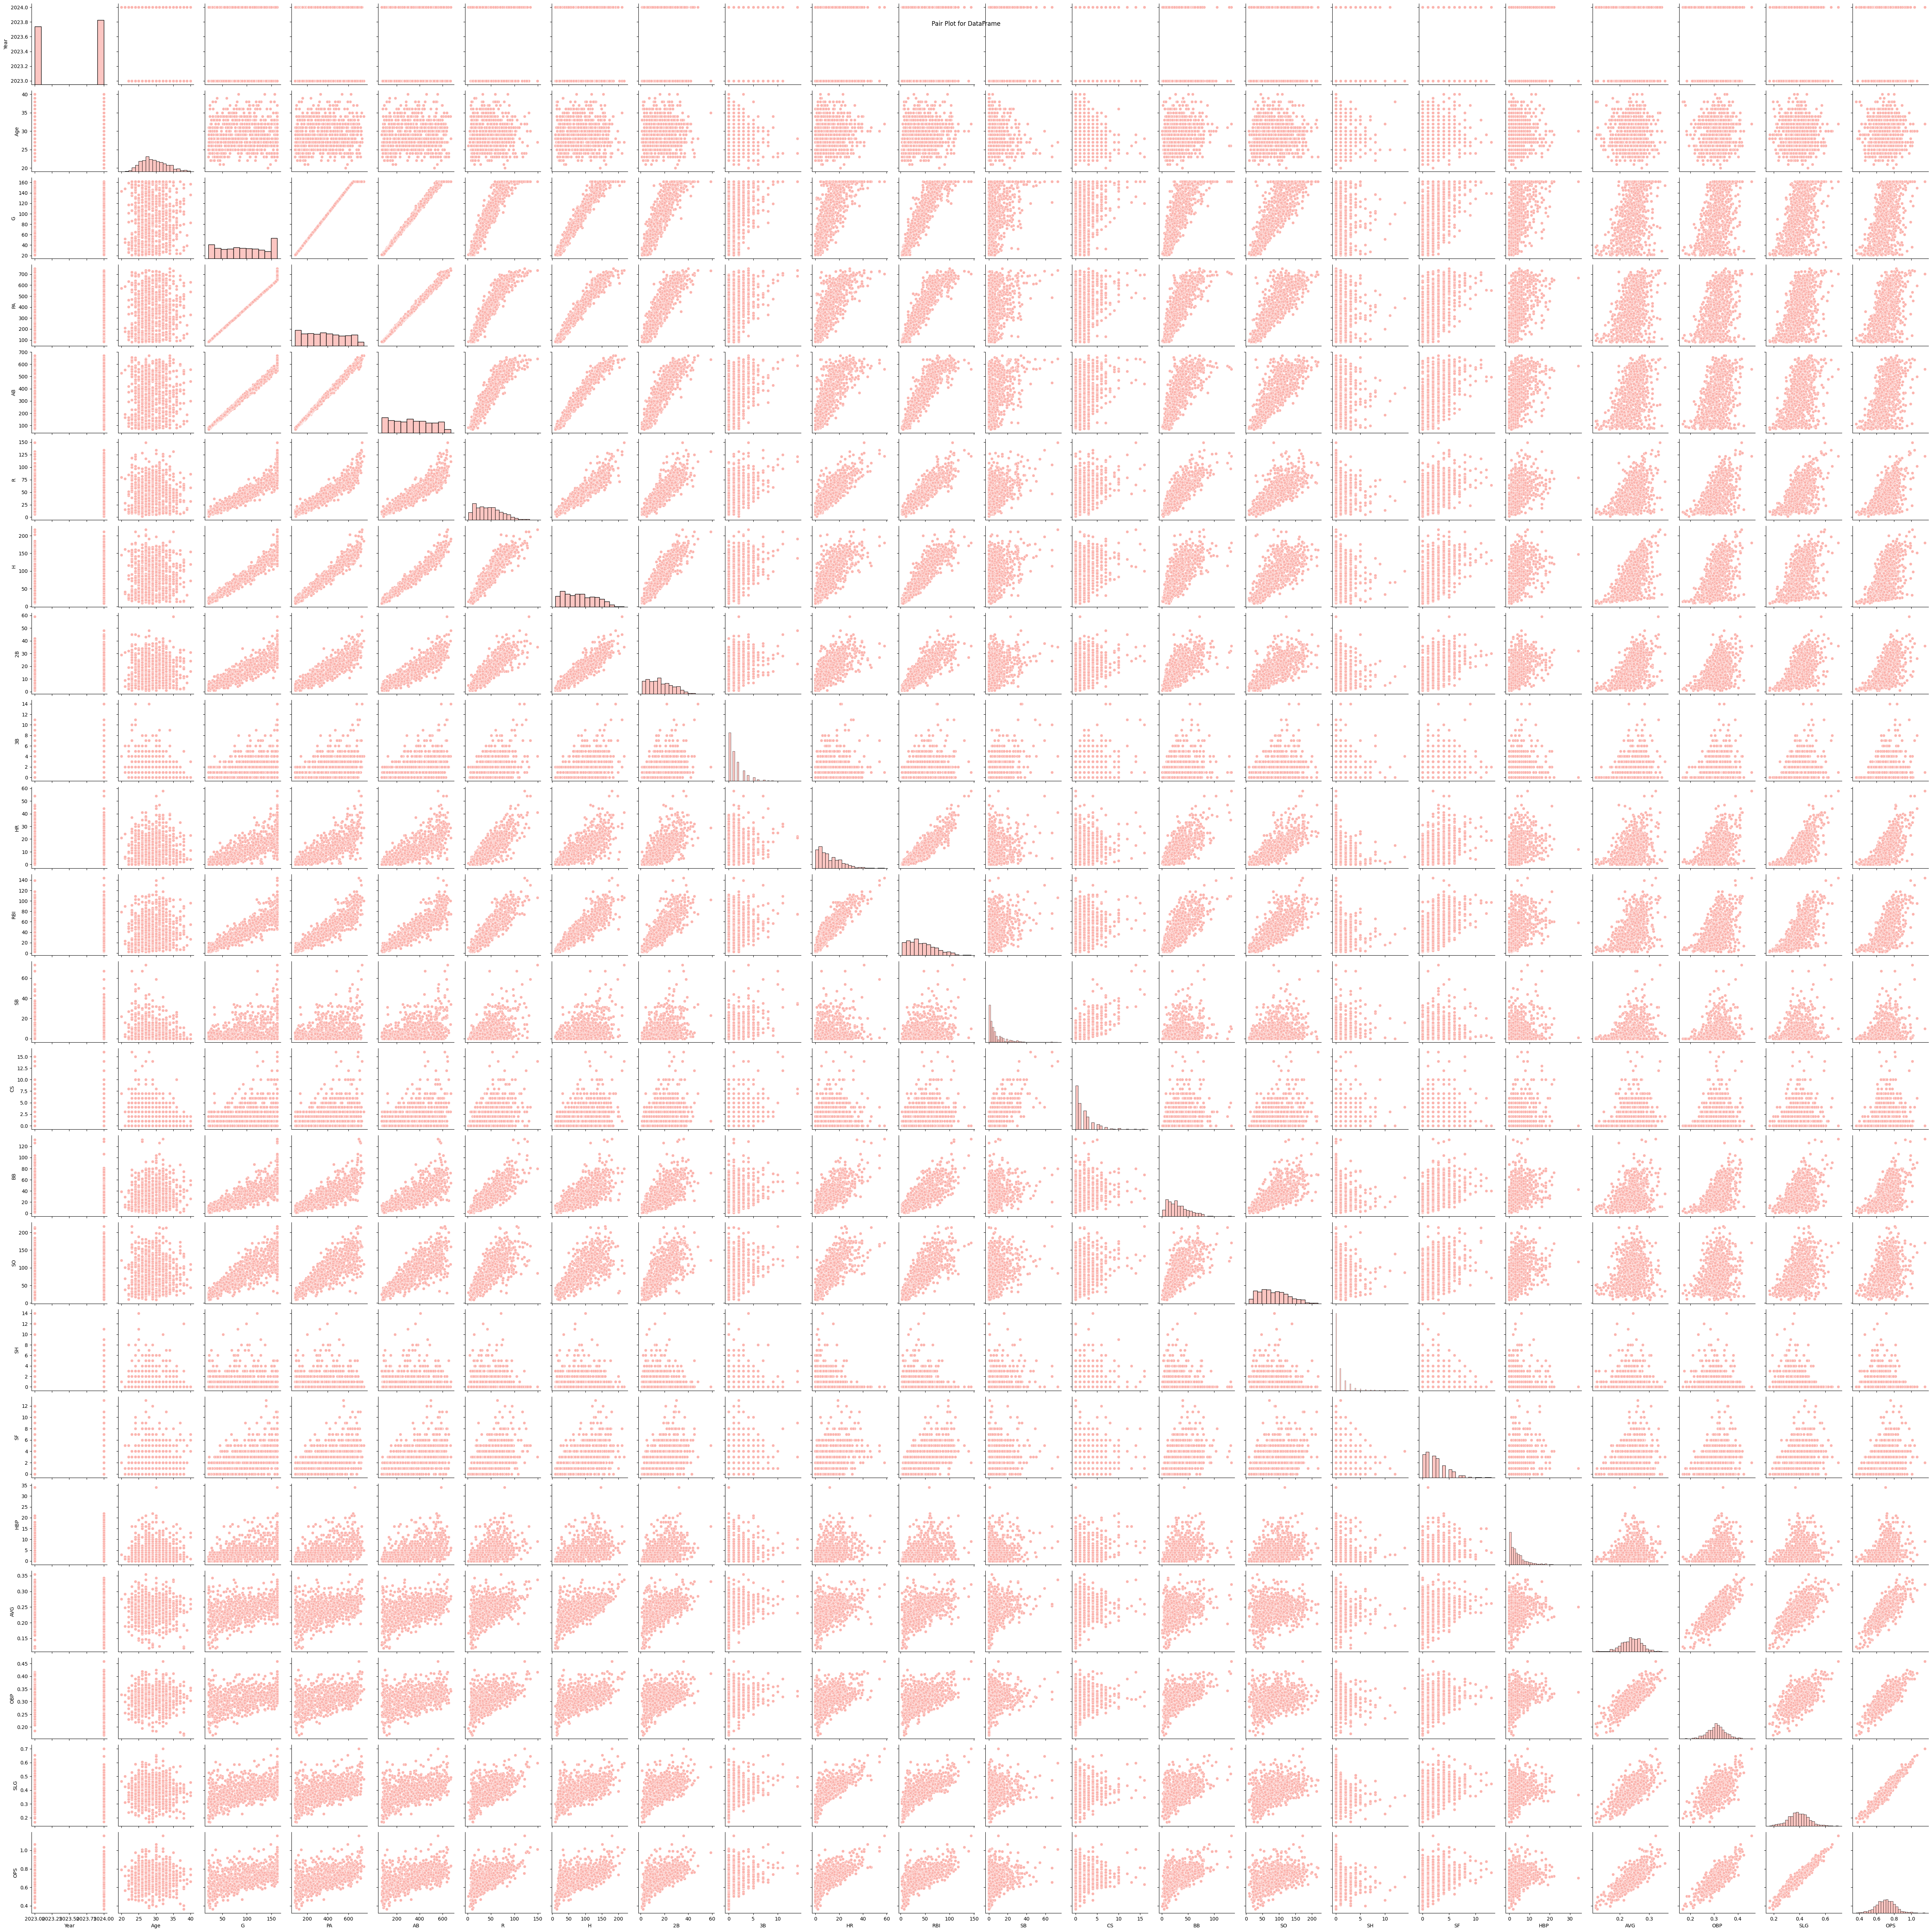

In [ ]:
# pair plot
sns.set_palette("Pastel1")

plt.figure(figsize=(10, 6))

sns.pairplot(df_merged)

plt.suptitle('Pair Plot for DataFrame')
plt.show()

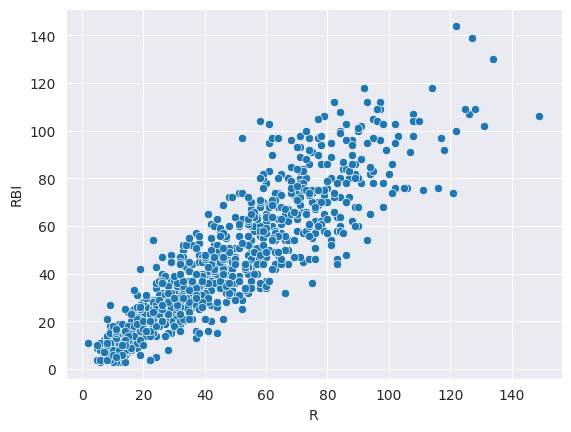

In [ ]:
# compare runs and RBI
sns.scatterplot(x="R", y="RBI", data=df_merged)

plt.show()

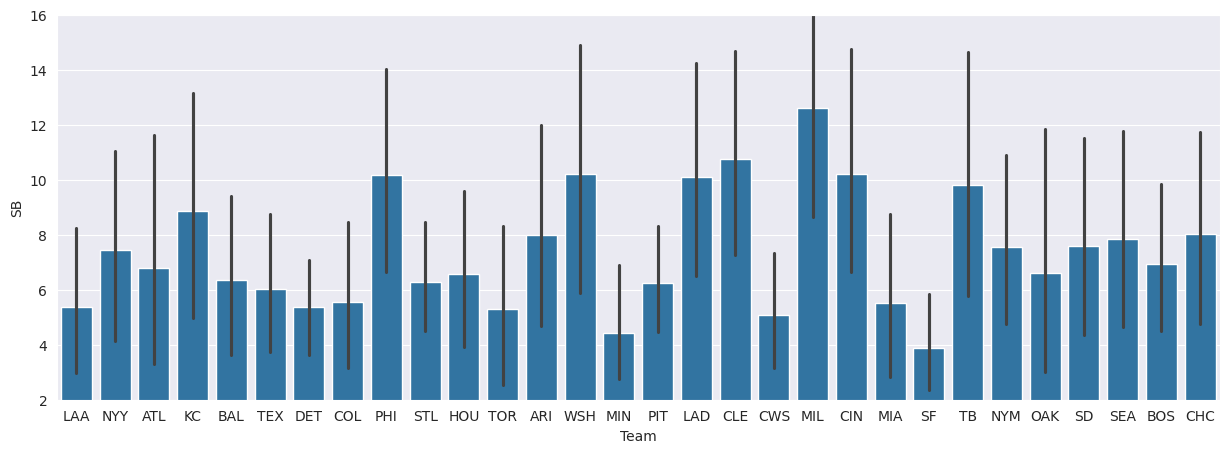

In [ ]:
# compare team's stolen bases
plt.figure(figsize=(15, 5))
sns.barplot(x="Team", y="SB", data=df_merged)
plt.ylim(2, 16)
plt.show()

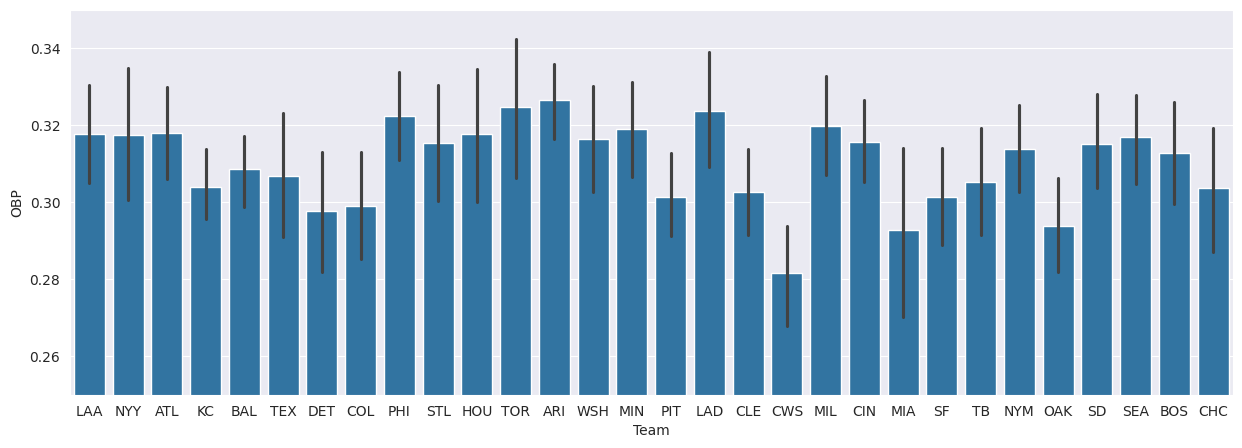

In [ ]:
# compare team's OBP
plt.figure(figsize=(15, 5))
sns.barplot(x="Team", y="OBP", data=df_merged)
plt.ylim(0.25, 0.35)
plt.show()

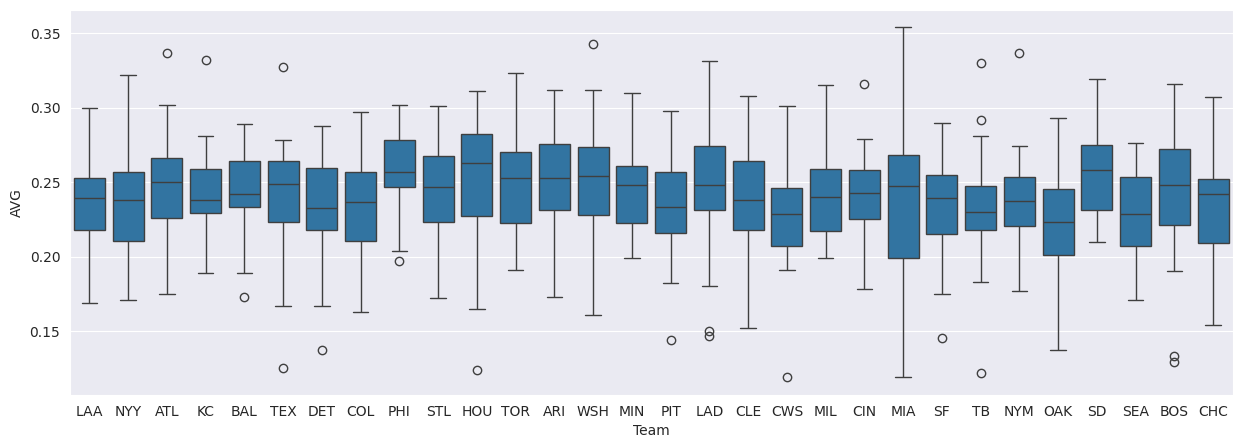

In [ ]:
# compare team's AVG
plt.figure(figsize=(15, 5))
sns.boxplot(x="Team", y="AVG", data=df_merged)
plt.show()

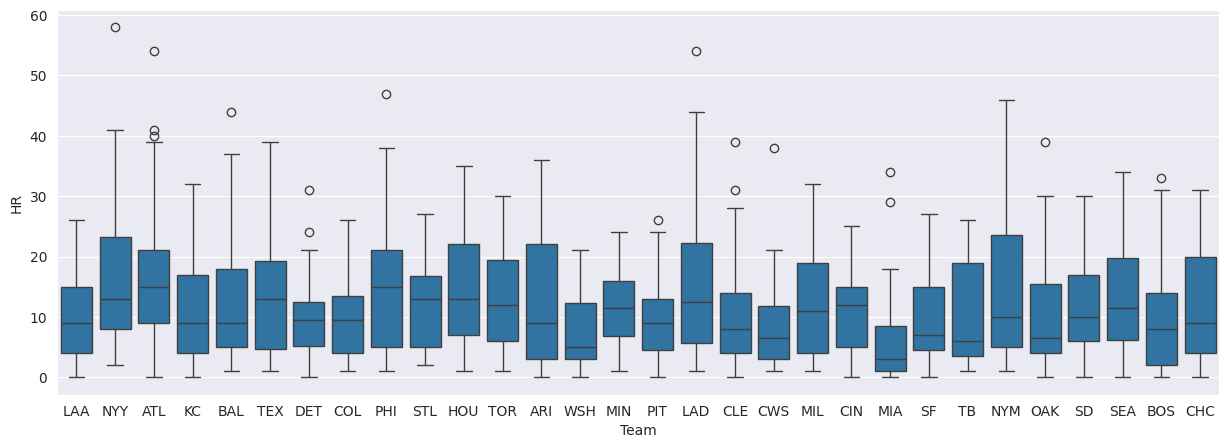

In [ ]:
# compare team's home runs
plt.figure(figsize=(15, 5))
sns.boxplot(x="Team", y="HR", data=df_merged)
plt.show()

In [ ]:
# comparing two categorical columns team and position
pd.crosstab(df_merged["Team"], df_merged["Pos"])

Pos   1B  2B  3B  C  DH  OF  SS
Team                           
ARI    4   2   3  7   2  12   5
ATL    2   9   5  4   2  12   2
BAL    4   6   6  4   2   9   2
BOS    3   8   2  6   2  10   4
CHC    4   4   6  7   1   9   2
CIN    8   2   4  5   1  15   2
CLE    2   2   3  6   1  14   5
COL    2   2   5  3   2  11   3
CWS    2   6   2  3   0  16   1
DET    2   3   1  3   0  12   5
HOU    4   2   2  4   0  14   3
KC     4   4   2  4   2  11   6
LAA    3   5   2  4   1  10   2
LAD    2   5   6  4   2  11   2
MIA    6   3   0  3   1   7   4
MIL    3   6   1  5   0   8   2
MIN    2   2   4  4   2  13   5
NYM    2   3   5  4   2  13   2
NYY    3   2  10  3   2   8   2
OAK    4   2   5  3   2  10   4
PHI    2   2   4  4   2   9   4
PIT    2   2   4  7   2  17   5
SD     0   4   4  7   0   8   6
SEA    4   5   4  5   0  10   2
SF     4   7   2  6   0  14   2
STL    2   4   2  4   3  10   3
TB     4   8   1  3   0   7   4
TEX    3   2   7  6   0   8   2
TOR    3   3   2  2   1   5   3
WSH    1   2   3  4   6  10   2

## Multivaraite variables

Interactions between three or more variables in a dataset are simultaneously analyzed and interpreted in multivariate analysis. It seeks to reveal intricate patterns, relationships, and interactions between them.

Here, we are going to show the multivariate analysis using a correlation matrix plot.

NOTE: This works only for numerical values


# Correlation plots


In [ ]:
# show players position, team, AVG, SB, HR, RBI

# convert positions to numerical
df_merged["Pos"] = df_merged["Pos"].astype("category")
df_merged["Pos"] = df_merged["Pos"].cat.codes


# convert team to numerical
df_merged["Team"] = df_merged["Team"].astype("category")
df_merged["Team"] = df_merged["Team"].cat.codes

# subset of players position, team, AVG, SB, HR, RBI
df_merged_subset = df_merged[["Pos", "Team", "AVG", "SB", "HR", "RBI"]]
df_merged_subset.head()

Pos  Team    AVG  SB  HR  RBI
0    5    12  0.253   6   8   36
1    5    18  0.267   3  37   75
2    5     1  0.247   4  21   58
3    1    11  0.240  11  13   60
4    3     2  0.277   1  20   80

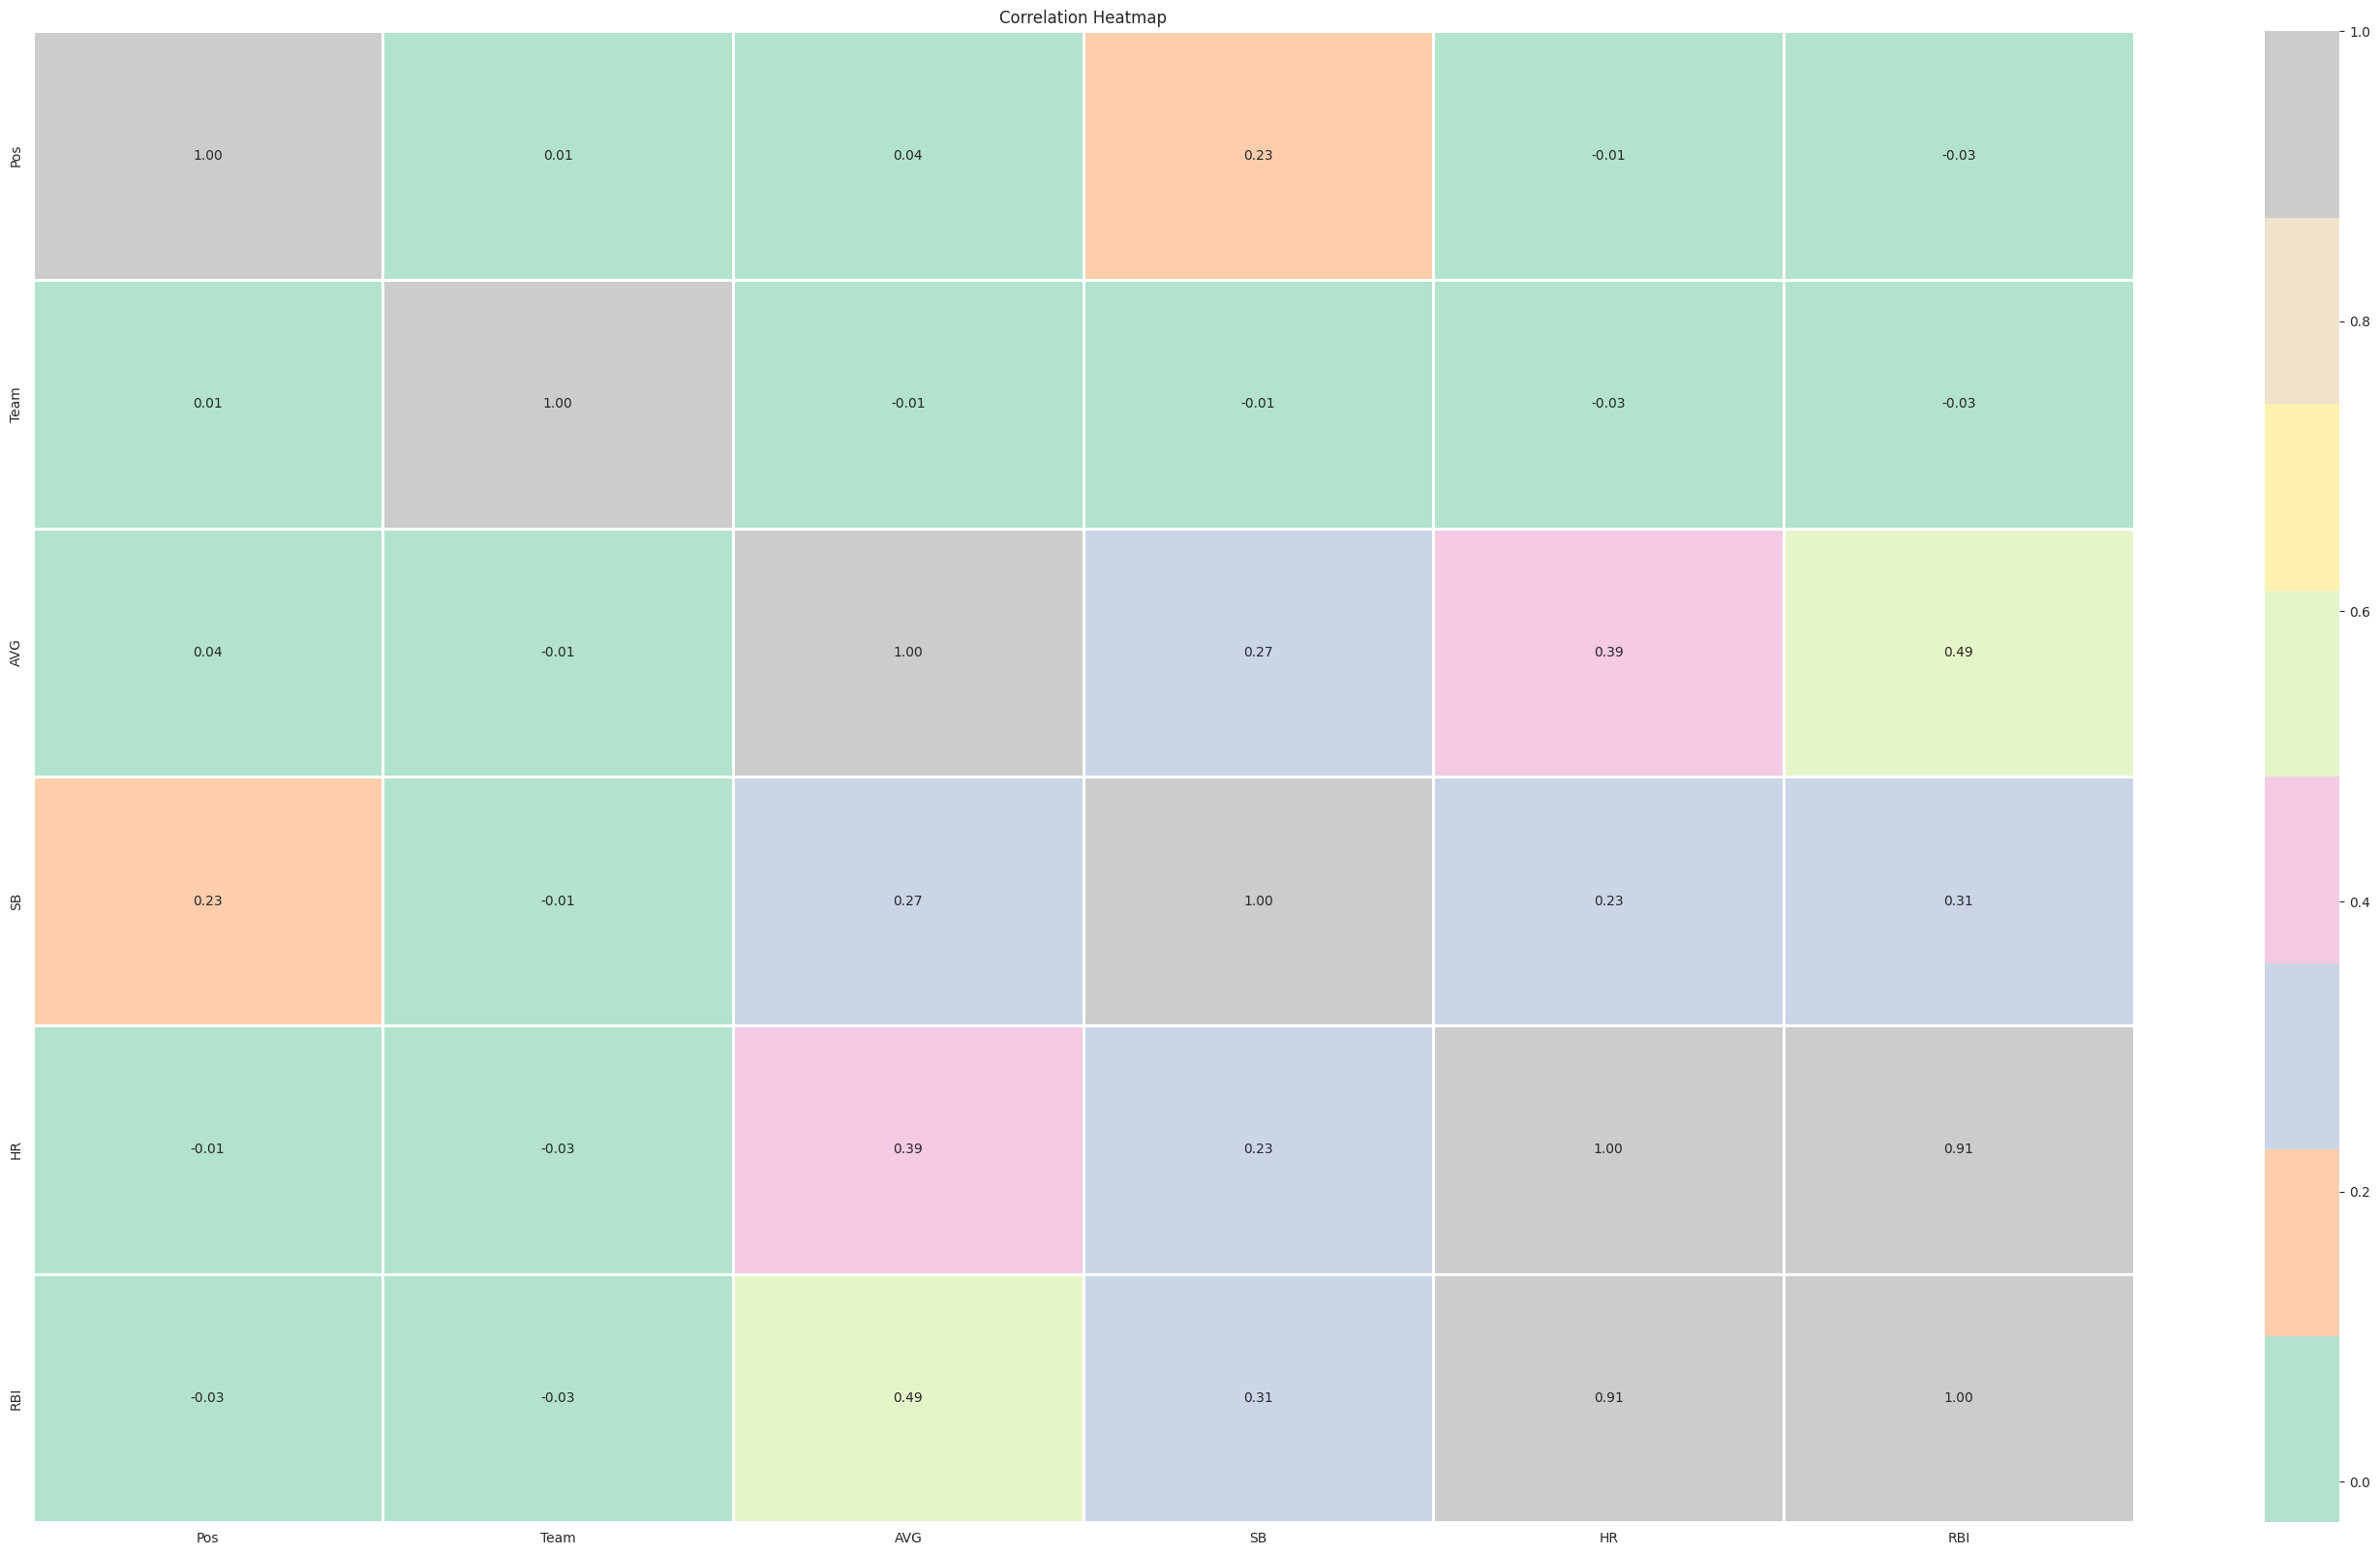

In [ ]:
# corrrelation of players position, team, AVG, SB, HR, RBI
plt.figure(figsize=(35, 20))

sns.heatmap(df_merged_subset.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

Values close to +1 indicates strong positive correlation, -1 indicates a strong negative correlation and 0 indicates suggests no linear correlation.

Darker colors signify strong correlation, while light colors represents weaker correlations.
Positive correlation variable move in same directions. As one increases, the other also increases.
Negative correlation variable move in opposite directions. An increase in one variable is associated with a decrease in the other.

### Query statements or Research Questions

Pose questions that help you pull out patterns

- highest/lowest value as per a categorical varaible
- counts of data points in two categical varaibles
- How one varaible varies as another (numerical) - correlations plots and pair plots


## Summary

Univariate analysis:
- categorical column -> Bar plot
- numerical -> histogram

Bivariate:
- categorical and numerical -> Bar or box
- Numerical and numerical -> Scatter plot
- categorical and categorical -> crosstab, heatmap

Multivariate:
- use pair plots
- correlation plots
- bar charts, scatter with third dimension can also be used.